## PFG Bank: Credit Card Design

* Team-lead GitHub userid: rsm-xyz123
* Group name:
* Team member names:
    -
    -
    -
    -

## Setup

Please complete this python notebook with your group by answering the questions in `pfg-bank-msba.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm


In [2]:
pip install --user pyrsm --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
rsm.__version__ # should be 0.9.23 or newer
import matplotlib.pyplot as plt

## Question answers

In [4]:
file_path = 'data/exhibits.xls'

exhibit1 = pd.read_excel(file_path, sheet_name='exhibit1')

exhibit2 = pd.read_excel(file_path, sheet_name='exhibit2')

**1. Why does Customer Lifetime Value vary with BK score? Why does Customer Lifetime Value vary by product? (See Exhibit 2 to help answer these questions) (3 points)**

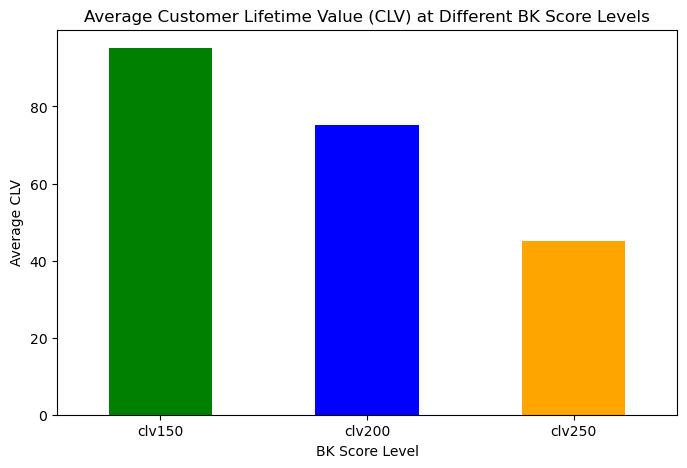

In [5]:
clv_columns = ['clv150', 'clv200', 'clv250']
clv_means = exhibit2[clv_columns].mean()

# 绘制条形图
clv_means.plot(kind='bar', figsize=(8, 5), color=['green', 'blue', 'orange'])
plt.title('Average Customer Lifetime Value (CLV) at Different BK Score Levels')
plt.xlabel('BK Score Level')
plt.ylabel('Average CLV')
plt.xticks(rotation=0)
plt.show()

**Based on the bar chart that we've looked at, we can see that our average Customer Lifetime Value (CLV) varies across different BK score levels. We observe that our average CLV is the highest for clv150, then for clv200, and it is the lowest for clv250. This suggests that as the BK score level rises—which we assume indicates a lower credit risk—our average CLV decreases.**

**The reasons for this might be diverse. We might be charging customers with higher credit risks higher interest rates or fees, which increases their CLV. They may also be utilizing our financial products and services more frequently or engaging in behaviors that lead to additional charges, such as overdrafts or late payments, thus inflating the revenue we gain from these customers. In contrast, customers with lower risk might choose more competitive products and exhibit more consistent repayment behaviors, which could result in a lower CLV for us.**

**We have to be mindful that this trend doesn't necessarily imply that higher-risk customers are always more lucrative for us. A higher CLV could come with increased risk of default and credit losses, which would require us to undertake more nuanced risk adjustments to accurately assess the real profitability of different customer groups for our business.**

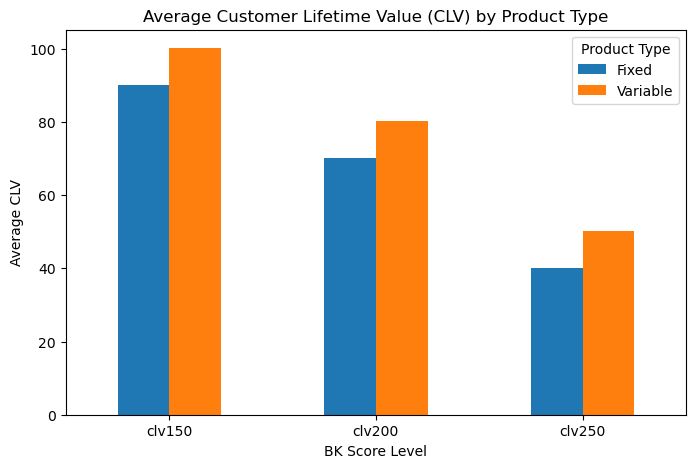

In [6]:
fixed_clv = exhibit2[exhibit2['fixed_var'] == 'Fixed'][['clv150', 'clv200', 'clv250']].mean()
variable_clv = exhibit2[exhibit2['fixed_var'] == 'Variable'][['clv150', 'clv200', 'clv250']].mean()

# Combining the data into a single DataFrame for plotting
clv_comparison = pd.DataFrame({'Fixed': fixed_clv, 'Variable': variable_clv})

# Plotting the bar chart
clv_comparison.plot(kind='bar', figsize=(8, 5))
plt.title('Average Customer Lifetime Value (CLV) by Product Type')
plt.xlabel('BK Score Level')
plt.ylabel('Average CLV')
plt.xticks(rotation=0)
plt.legend(title='Product Type')
plt.show()


**Upon reviewing the bar chart that represents the average Customer Lifetime Value (CLV) by product type across different BK score levels, we notice a distinct pattern. Variable rate products consistently show a higher average CLV at each BK score level compared to fixed-rate products.** 

**This suggests that variable products might offer us more flexibility in pricing, which could attract a customer segment that is either less sensitive to price changes or is seeking potential benefits from a fluctuating rate. Consequently, these customers might contribute more to our revenue over the course of their relationship with us, hence a higher CLV.**

**Moreover, variable rate products may also carry higher interest rates over time, especially if the benchmark interest rates increase, leading to increased revenue for us. It could also indicate that customers choosing variable products are engaging more with additional services we offer, further contributing to their lifetime value.**

**This pattern prompts us to consider that the product structure—fixed versus variable—can significantly impact the lifetime value of customers, and it's a critical factor for us to consider in our product development and customer relationship management strategies.**

**2. Are predictive models estimated on historical data useful in this case? If so, why? If not, why not? (4 points)**

Predictive models estimated on historical data are indeed useful in this case for several reasons:

1. **Historical Performance Analysis**: These models can help analyze how different product offerings have performed historically, which provides an empirical basis to estimate future performance. By understanding how customers with different BK scores have responded to various products in the past, we can make more informed predictions about how similar customers are likely to behave.

2. **Segmentation and Targeting**: The models allow for segmentation of the customer base according to their BK score and past responses to product offers. By identifying patterns in this historical data, we can tailor our offers more precisely, targeting the right product to the right customer segment.

3. **Risk Management**: Historical data can inform predictive models about the risk associated with different customer groups and product types. Understanding the risk profile is crucial for managing credit risk and for deciding which offers are most appropriate for which BK groups.

4. **Resource Optimization**: Using historical data to estimate the response to different solicitation strategies can help in optimizing the allocation of marketing resources. It ensures that efforts and costs are focused where they are most likely to generate a high return.

However, we should exercise caution because historical models can sometimes be less predictive if market conditions change or if there are shifts in customer preferences. They also rely on the quality and relevance of the historical data; if the data does not accurately represent current conditions, the models' predictions may be off.

Additionally, over-reliance on historical models can lead to a lack of innovation. It's important to balance the insights from these models with creative and forward-thinking strategies that anticipate changes in the market and consumer behavior.

**3. Is there a “best product” that will likely be preferred by all customers? If so, what is it? (3 points)**

In [16]:
data1 = pd.read_excel("data/exhibits.xls", sheet_name="exhibit1")
data2 = pd.read_excel("data/exhibits.xls", sheet_name="exhibit2")

In [18]:
data1

,date,apr,fixed_var,annual_fee,visamc,nr_mailed,non_resp,resp,bk_score,average_bk
0,April,16.8,Fixed,20,MC,167000,165467,1533,200,210
1,April,16.8,Fixed,0,MC,81000,78104,2896,200,210
2,April,19.8,Fixed,20,MC,143000,142410,590,200,210
3,April,19.8,Fixed,0,MC,100000,97948,2052,200,210
4,September,14.9,Fixed,20,Visa,177000,172671,4329,250,255
5,September,14.9,Variable,20,Visa,170000,166996,3004,250,255
6,September,16.8,Fixed,20,Visa,255000,252017,2983,250,255
7,September,19.8,Fixed,20,Visa,35000,34825,175,250,255
8,September,16.8,Fixed,0,Visa,65000,62484,2516,250,255
9,September,19.8,Fixed,0,Visa,95000,92885,2115,250,255


In [22]:
data1.dtypes

date           object
apr           float64
fixed_var      object
annual_fee      int64
visamc         object
nr_mailed       int64
non_resp        int64
resp            int64
bk_score        int64
average_bk      int64
dtype: object

In [25]:
data1_melt = pd.melt(
    data1,
    id_vars=["date", "apr", "fixed_var", "annual_fee", "visamc", "bk_score", "average_bk"],
    value_vars=["resp", "non_resp"],
    var_name="resp",
    value_name="freq",
)
data1_melt["apr"] = data1_melt.apr.astype("category")
data1_melt["annual_fee"] = data1_melt.annual_fee.astype("category")
data1_melt

,date,apr,fixed_var,annual_fee,visamc,bk_score,average_bk,resp,freq
0,April,16.8,Fixed,20,MC,200,210,resp,1533
1,April,16.8,Fixed,0,MC,200,210,resp,2896
2,April,19.8,Fixed,20,MC,200,210,resp,590
3,April,19.8,Fixed,0,MC,200,210,resp,2052
4,September,14.9,Fixed,20,Visa,250,255,resp,4329
5,September,14.9,Variable,20,Visa,250,255,resp,3004
6,September,16.8,Fixed,20,Visa,250,255,resp,2983
7,September,19.8,Fixed,20,Visa,250,255,resp,175
8,September,16.8,Fixed,0,Visa,250,255,resp,2516
9,September,19.8,Fixed,0,Visa,250,255,resp,2115


In [32]:
lr1 = rsm.model.logistic(
    data = {'data1_melt': data1_melt},
    rvar = "resp",lev = 'resp', evar = ['apr', 'fixed_var', 'annual_fee', 'visamc', 'date'],
    ivar = ['date:fixed_var'],
    weights = 'freq'
)

lr1.summary()

Logistic regression (GLM)
Data                 : data1_melt
Response variable    : resp
Level                : resp
Explanatory variables: apr, fixed_var, annual_fee, visamc, date
Weights used         : freq
Null hyp.: There is no effect of x on resp
Alt. hyp.: There is an effect of x on resp

                                        OR     OR%  coefficient  std.error  z.value p.value     
Intercept                            0.076  -92.4%        -2.58      0.025 -103.238  < .001  ***
apr[16.8]                            0.464  -53.6%        -0.77      0.019  -39.607  < .001  ***
apr[19.8]                            0.252  -74.8%        -1.38      0.024  -56.607  < .001  ***
fixed_var[Variable]                  0.843  -15.7%        -0.17      0.016  -10.570  < .001  ***
annual_fee[20]                       0.287  -71.3%        -1.25      0.015  -83.818  < .001  ***
visamc[Visa ]                        0.970   -3.0%        -0.03      0.013   -2.404   0.016    *
date[November]            

In [34]:
lr = rsm.model.logistic(
    data = {'data1_melt': data1_melt},
    rvar = "resp",lev = 'resp', evar = ['apr', 'fixed_var', 'annual_fee', 'visamc', 'date'],
    weights = 'freq'
)

lr.summary()

Logistic regression (GLM)
Data                 : data1_melt
Response variable    : resp
Level                : resp
Explanatory variables: apr, fixed_var, annual_fee, visamc, date
Weights used         : freq
Null hyp.: There is no effect of x on resp
Alt. hyp.: There is an effect of x on resp

                        OR     OR%  coefficient  std.error  z.value p.value     
Intercept            0.074  -92.6%        -2.60      0.024 -106.692  < .001  ***
apr[16.8]            0.471  -52.9%        -0.75      0.019  -39.875  < .001  ***
apr[19.8]            0.257  -74.3%        -1.36      0.024  -57.254  < .001  ***
fixed_var[Variable]  0.741  -25.9%        -0.30      0.021  -14.336  < .001  ***
annual_fee[20]       0.290  -71.0%        -1.24      0.015  -84.443  < .001  ***
visamc[Visa ]        0.979   -2.1%        -0.02      0.012   -1.703   0.089    .
date[November]       0.829  -17.1%        -0.19      0.014  -13.785  < .001  ***
date[September]      1.181   18.1%         0.17      0.00